In [70]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Task A
-	Load the Superstore dataset using Pandas.

-	Select key columns: Sales, Profit, Discount, Quantity, Category, Sub-Category, Segment, Region, Ship Mode

-	Create a derived attribute: Profit Margin = Profit / Sales.

-	Handle extreme outliers: filter or cap Sales > 10,000.


In [71]:
df = pd.read_csv('Superstore.csv', encoding_errors='ignore')
display(df.head())


Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   South  FUR-BO-10001798        Furniture    Bookcases   
1       42420   South  FUR-CH-10000454        Furniture       Chairs   
2       90036    West  OFF-LA-10000240  Office Supplies       Labels   
3       33311   South  FUR-TA-10000577        Furniture       Tables   
4       33311   South  OFF-ST-10000760  Office Supplies      Storage   

                                        Product Name     Sales  Quantity  \
0                  Bush Somerset Collection Bookcase  261.9600         2   
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400         3   
2  Self-Adhesive Address Labels for Typewriters b...   14.6200         2   
3      Bretford CR4500 Series Slim Rectangular Table  957.5775         5   
4                     Eldon Fold 'N Roll Cart System   22.3680         2   

   Discount    Profit  
0      0.00   41.9136  
1      0.00  219.5820  
2      0.00    6.8714  
3      0.45 -383.0310  
4      0.20    2.5164  

[5 rows x 21 columns]

In [72]:
df = df[['Sales', 'Profit', 'Discount', 'Quantity', 'Category', 'Sub-Category', 'Segment', 'Region', 'Ship Mode']]
display(df.head())

Sales    Profit  Discount  Quantity         Category Sub-Category  \
0  261.9600   41.9136      0.00         2        Furniture    Bookcases   
1  731.9400  219.5820      0.00         3        Furniture       Chairs   
2   14.6200    6.8714      0.00         2  Office Supplies       Labels   
3  957.5775 -383.0310      0.45         5        Furniture       Tables   
4   22.3680    2.5164      0.20         2  Office Supplies      Storage   

     Segment Region       Ship Mode  
0   Consumer  South    Second Class  
1   Consumer  South    Second Class  
2  Corporate   West    Second Class  
3   Consumer  South  Standard Class  
4   Consumer  South  Standard Class

In [73]:
df['Profit Margin'] = df['Profit'] / df['Sales']
display(df.head())

Sales    Profit  Discount  Quantity         Category Sub-Category  \
0  261.9600   41.9136      0.00         2        Furniture    Bookcases   
1  731.9400  219.5820      0.00         3        Furniture       Chairs   
2   14.6200    6.8714      0.00         2  Office Supplies       Labels   
3  957.5775 -383.0310      0.45         5        Furniture       Tables   
4   22.3680    2.5164      0.20         2  Office Supplies      Storage   

     Segment Region       Ship Mode  Profit Margin  
0   Consumer  South    Second Class         0.1600  
1   Consumer  South    Second Class         0.3000  
2  Corporate   West    Second Class         0.4700  
3   Consumer  South  Standard Class        -0.4000  
4   Consumer  South  Standard Class         0.1125

In [74]:
print("Head of data > 10000 before filtering:")
display(df[df['Sales'] > 10000].head())

filtered_df = df[df['Sales'] <= 10000].copy()

print("\nHead of data after filtering (Sales <= 10000):")
display(filtered_df[filtered_df['Sales'] > 10000].head())

Head of data > 10000 before filtering:


Sales     Profit  Discount  Quantity    Category Sub-Category  \
2623  11199.968  3919.9888       0.2         4  Technology      Copiers   
2697  22638.480 -1811.0784       0.5         6  Technology     Machines   
4190  10499.970  5039.9856       0.0         3  Technology      Copiers   
6826  17499.950  8399.9760       0.0         5  Technology      Copiers   
8153  13999.960  6719.9808       0.0         4  Technology      Copiers   

          Segment   Region       Ship Mode  Profit Margin  
2623  Home Office     East     First Class           0.35  
2697  Home Office    South  Standard Class          -0.08  
4190     Consumer     East  Standard Class           0.48  
6826    Corporate  Central  Standard Class           0.48  
8153     Consumer     West     First Class           0.48


Head of data after filtering (Sales <= 10000):


Empty DataFrame
Columns: [Sales, Profit, Discount, Quantity, Category, Sub-Category, Segment, Region, Ship Mode, Profit Margin]
Index: []

#TASK B
•	Histogram of Profit Margin with Matplotlib and Seaborn.

•	Overlay Sales distribution for Furniture vs Technology. (for comparison between categories)


•	Add proper axis labels, titles, and legends.


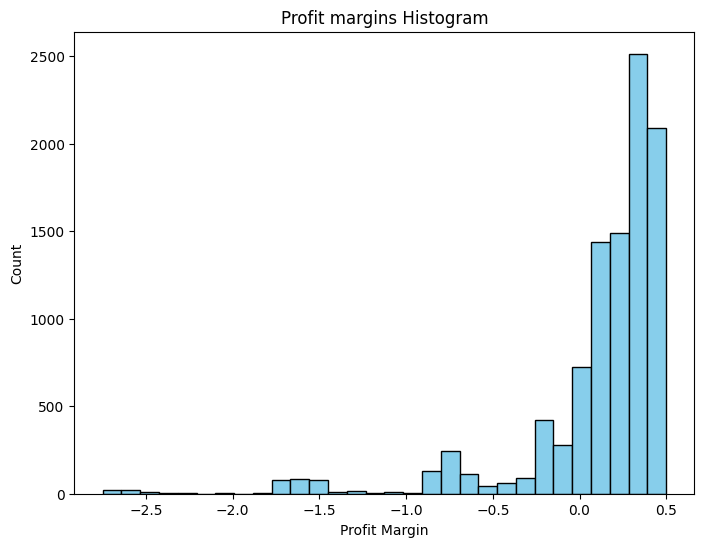

In [75]:
plt.figure(figsize=(8,6))
plt.hist(filtered_df['Profit Margin'], bins=30, color='skyblue', edgecolor='black')
plt.title("Profit margins Histogram")
plt.xlabel("Profit Margin")
plt.ylabel("Count")
plt.show()


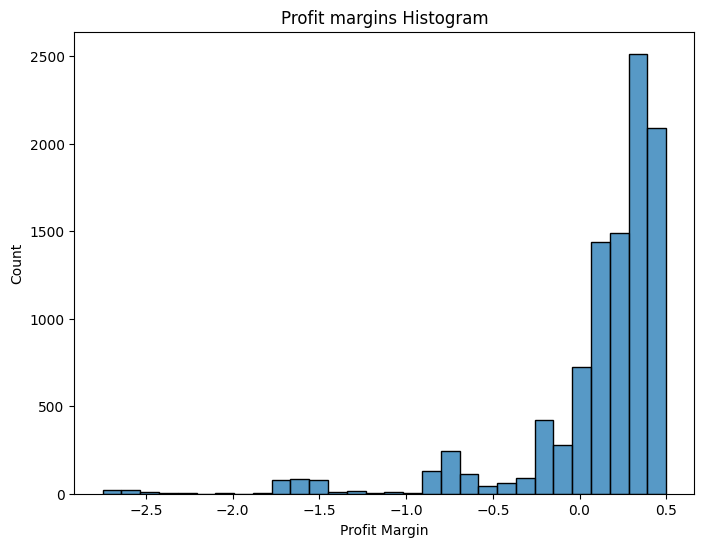

In [76]:
import seaborn as sns
plt.figure(figsize=(8,6))
sns.histplot(data=filtered_df, x="Profit Margin", bins=30)
plt.title("Profit margins Histogram")
plt.xlabel("Profit Margin")
plt.ylabel("Count")
plt.show()

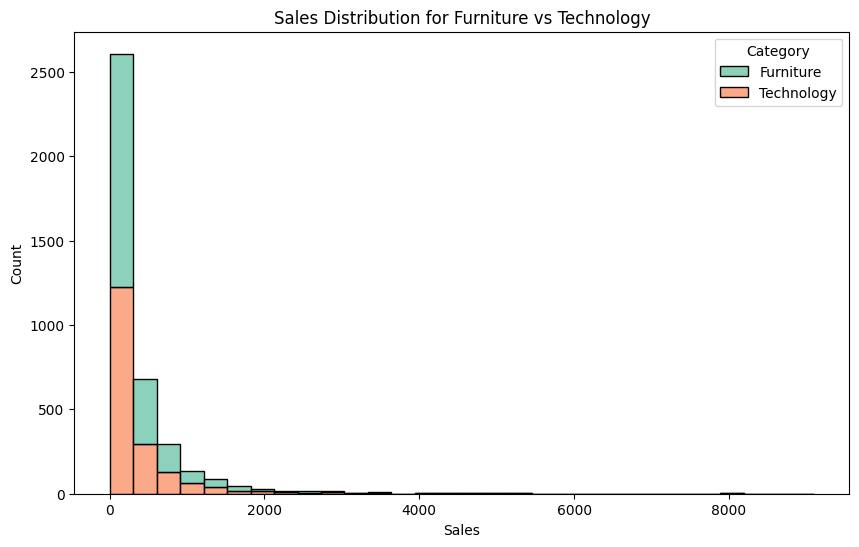

In [77]:
# Filter the DataFrame for 'Technology' and 'Furniture' categories
tech_furn_df = filtered_df[filtered_df['Category'].isin(['Technology', 'Furniture'])]

plt.figure(figsize=(10, 6))
sns.histplot(data=tech_furn_df, x="Sales", hue="Category", multiple="stack", bins=30, palette="Set2")
plt.title('Sales Distribution for Furniture vs Technology')
plt.xlabel('Sales')
plt.ylabel('Count')
plt.show()

#Task C
•	In the same Jupyter Notebook

  o	Sales vs Profit scatter plot with size=Discount and color=Category

  o	Regression lines for each Category

•	Add proper axis labels, titles, and legends.


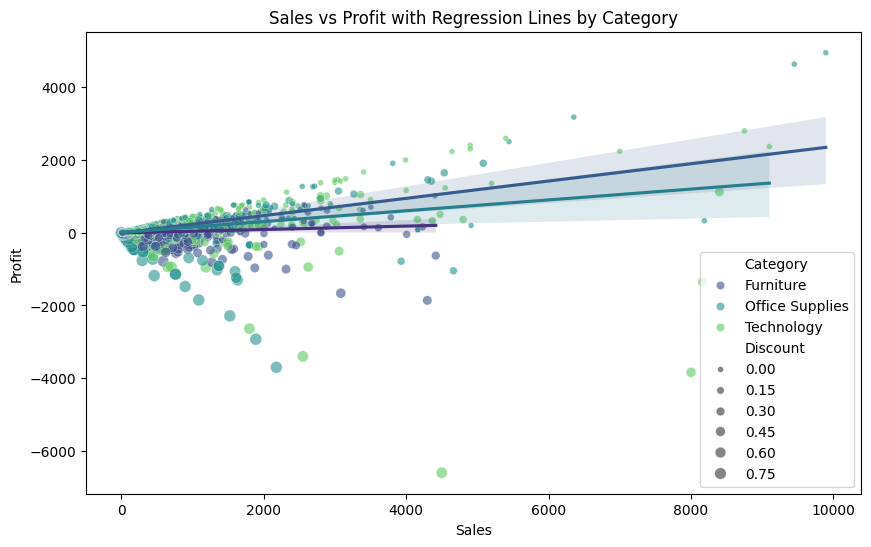

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a scatter plot with size based on Discount and color based on Category
plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_df, x="Sales", y="Profit", hue="Category", size="Discount", palette="viridis", alpha=0.6)

# Add regression lines for each category
for category in filtered_df['Category'].unique():
    sns.regplot(data=filtered_df[filtered_df['Category'] == category], x="Sales", y="Profit", scatter=False, color=sns.color_palette("viridis")[filtered_df['Category'].unique().tolist().index(category)])

plt.title('Sales vs Profit with Regression Lines by Category')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.show()

#TASK D
1. Which Category has the highest outlier sales?

2. Do higher Discounts always lead to higher sales but lower profit?
3. Which Region shows highest variability in Profit? (create a graph of your own choice)
4. Which visualization type was most effective for outlier detection vs trend detection?
5. Did Seaborn or Matplotlib give clearer insights overall?


In [79]:
# Calculate Q1, Q3, and IQR for Sales
Q1 = df['Sales'].quantile(0.25)
Q3 = df['Sales'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier threshold (e.g., 1.5 * IQR above Q3)
outlier_threshold = Q3 + 1.5 * IQR

# Filter the DataFrame for sales greater than the outlier threshold
high_sales_df = df[df['Sales'] > outlier_threshold]

# Get the count of each category in the filtered data
category_counts = high_sales_df['Category'].value_counts()

# Display the results
print(f"Outlier threshold for Sales (using IQR): {outlier_threshold:.2f}")
print("\nCount of each category for sales above the outlier threshold:")
display(category_counts)

Outlier threshold for Sales (using IQR): 498.93

Count of each category for sales above the outlier threshold:


Category
Furniture          467
Technology         400
Office Supplies    300
Name: count, dtype: int64

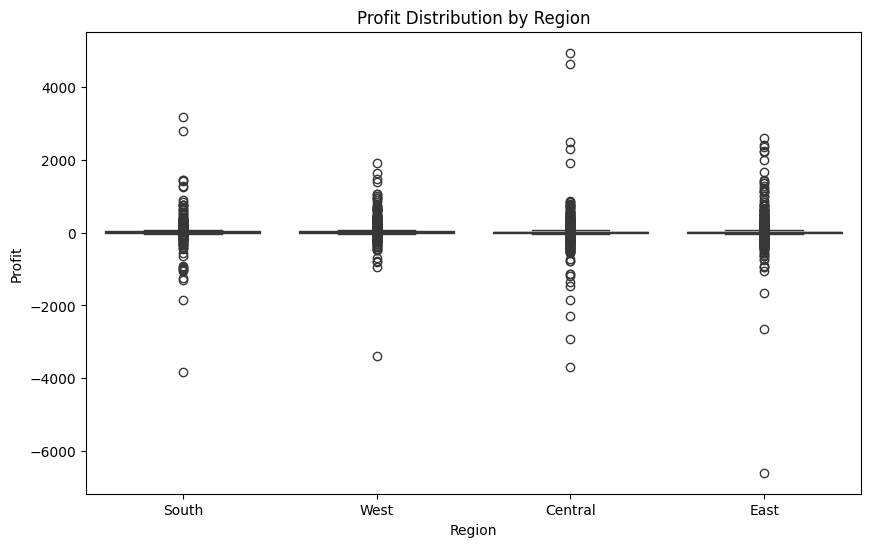

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(data=filtered_df, x='Region', y='Profit', hue='Region', palette='viridis', legend=False)
plt.title('Profit Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Profit')
plt.show()